# Exercise 1

<Figure size 640x480 with 0 Axes>

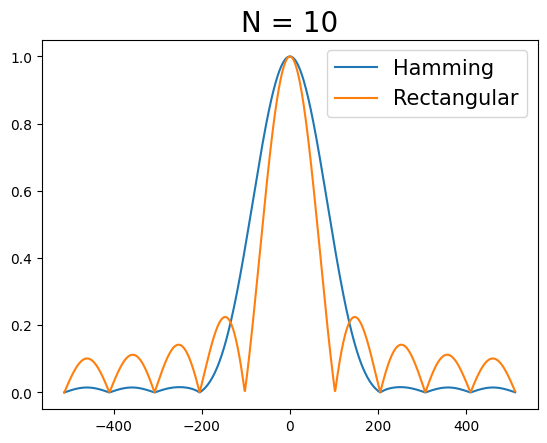

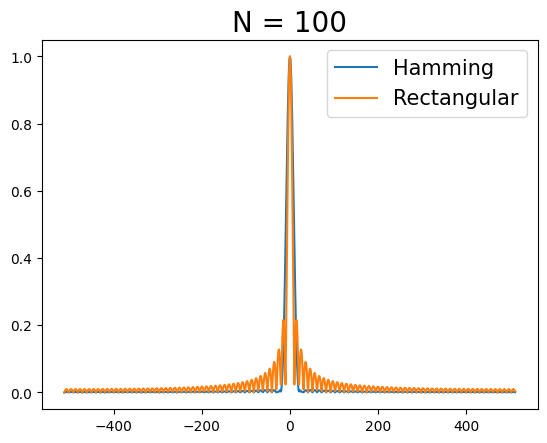

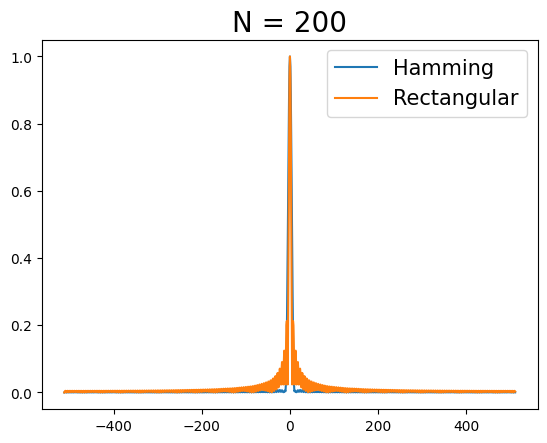

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Hamming window function
def w_h(n, N):
    """
    Computes the Hamming window value at index n for a window of size N.
    Args:
        n (int): The index (position) within the window.
        N (int): The total size of the window.
    Returns:
        float: The Hamming window value at index n.
    """
    if 0 <= n < N:
        return 0.54 - 0.46 * np.cos(2 * np.pi * n / N)
    return 0

# Define the Rectangular window function
def w_r(n, N):
    """
    Computes the Rectangular window value at index n for a window of size N.
    Args:
        n (int): The index (position) within the window.
        N (int): The total size of the window.
    Returns:
        int: 1 if 0 <= n < N, otherwise 0.
    """
    if 0 <= n < N:
        return 1
    return 0

# Define L1 normalization function for a vector
def norm_l_1(x):
    """
    Performs L1 normalization on a vector.
    Args:
        x (list): A list of values to normalize.
    Returns:
        list: The normalized vector where all elements sum to 1.
    """
    s = sum(x)
    for i in range(len(x)):
        x[i] /= s
    return x

# Define window sizes and FFT length
N = [10, 100, 200]  # Window sizes to analyze
L = 1024  # Length of FFT

# Create x-axis values for plotting
ax = np.linspace(-L // 2, L // 2 - 1, L, endpoint=True)

# Main figure for multiple plots
plt.figure()

# Process each window size in N
for i in range(len(N)):
    # Initialize the Hamming and Rectangular windows
    W_h = []
    W_r = []

    # Compute the values for Hamming and Rectangular windows
    for n in range(N[i]):
        W_h.append(w_h(n, N[i]))
        W_r.append(w_r(n, N[i]))

    # Normalize the windows using L1 normalization
    W_h = norm_l_1(W_h)
    W_r = norm_l_1(W_r)

    # Compute the FFT and shift the spectrum for plotting
    W_h_T = np.fft.fftshift(np.fft.fft(W_h, L))  # FFT of Hamming window
    W_r_T = np.fft.fftshift(np.fft.fft(W_r, L))  # FFT of Rectangular window

    # Plot the magnitude of the FFT results
    plt.figure()
    plt.plot(ax, np.abs(W_h_T), label='Hamming')
    plt.plot(ax, np.abs(W_r_T), label='Rectangular')
    plt.title('N = ' + str(N[i]), fontsize=20)
    plt.legend(fontsize=15, loc='upper right')

# Display all plots
plt.show()

In [27]:
def indicator(f_0, x, T):
    """
    Computes the indicator function value for a periodic signal.

    The indicator function determines if the given value `x` (modulo the period `T`)
    falls within the range \([-f_0, f_0]\). If it does, the function returns 1; otherwise, it returns 0.

    Args:
        f_0 (float): The threshold value that defines the range \([-f_0, f_0]\).
        x (float): The input value to be checked.
        T (float): The period of the signal.
    """
    x = x % T  # Wrap x into the range [0, T) using modulo
    if -f_0 < x < f_0:
        return 1
    else:
        return 0

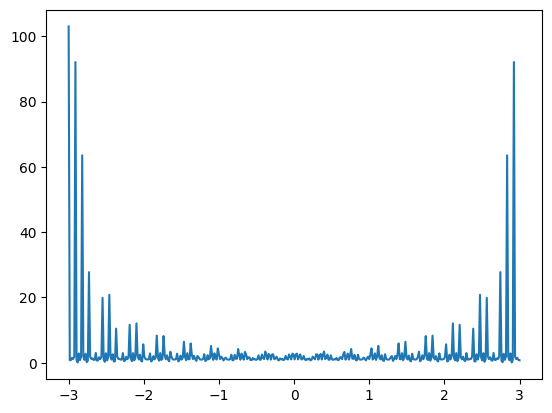

In [28]:
# Define parameters
N = 400          # Number of points in the signal
T = 1            # Period of the signal
f_0 = 1 / 4      # Frequency parameter for the indicator function

# Generate x-axis values
x = np.linspace(-3, 3, N)  # Create N evenly spaced points between -3 and 3

# Compute the indicator function values
h_n = [indicator(f_0, x[i], T) for i in range(N)]  # Apply the indicator function to each x value

# Compute the FFT of the indicator function
h_n_fft = np.fft.fft(h_n)  # Perform Fast Fourier Transform (FFT) on the signal

# Plot the magnitude of the FFT

# Exercise 2

In [38]:
def H_lambda(f0, N):
    """
    Computes the impulse response `h` of a filter based on the cutoff frequency `f0`
    and the size `N`.

    Args:
        f0 (float): The cutoff frequency of the filter.
        N (int): The total size of the filter.

    Returns:
        list: The computed impulse response `h` as a list of size `N`.
    """
    h = []  # Initialize the impulse response list

    # If N is even
    if N % 2 == 0:
        # Compute the impulse response using the formula for even N
        for n in range(-N // 2 + 1, N // 2 + 1):
            h.append(np.sin(np.pi * (2 * n - 1) * f0) / (np.pi * (2 * n - 1)))

    # If N is odd
    else:
        # Compute the impulse response using the formula for odd N
        for n in range((-N + 1) // 2, (N + 1) // 2):
            if n == 0:
                h.append(2 * f0)  # Special case where n = 0
            else:
                h.append(np.sin(2 * np.pi * n * f0) / (np.pi * n))

    return h  # Return the computed impulse response

In [40]:
def FIR(f0, N):
    """
    Computes the FIR (Finite Impulse Response) filter using a Hamming window.

    Args:
        f0 (float): The cutoff frequency of the filter.
        N (int): The size of the filter.

    Returns:
        numpy.ndarray: The FIR filter coefficients after applying the Hamming window.
    """
    W_h = []  # Initialize the Hamming window list

    # Compute the Hamming window values
    for n in range(N):
        W_h.append(w_h(n, N))  # Use the Hamming window function `w_h`

    # Compute the impulse response using `H_lambda`
    H_n = H_lambda(f0, N)

    # Apply the Hamming window to the impulse response
    g = np.multiply(H_n, W_h)  # Element-wise multiplication

    return g  # Return the FIR filter coefficients

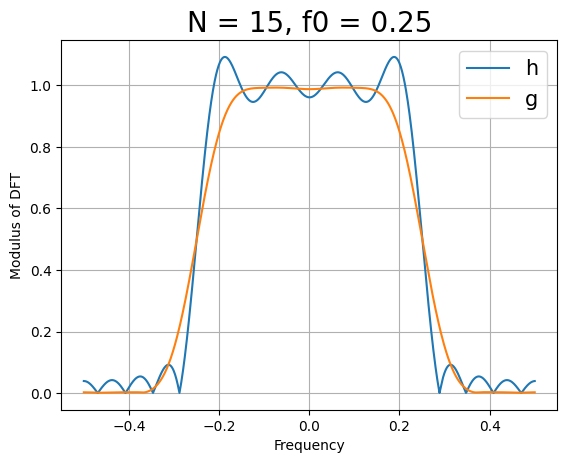

In [41]:
# Define N and f0
N = 15          # Filter size
f0 = 0.25       # Cutoff frequency

# Define number of frequency bins for FFT
L = 1024        # Number of points for FFT (frequency resolution)

# Define axis for plotting in the frequency domain
ax = np.linspace(-1/2, 1/2, L, endpoint=True)  # Frequency axis from -1/2 to 1/2

# Calculate h(n) (impulse response of the ideal filter)
H_n = H_lambda(f0, N)  # Use H_lambda to compute the impulse response
H_n_T = np.fft.fftshift(np.fft.fft(H_n, L))  # Compute FFT and shift for frequency-domain representation

# Calculate g(n) (FIR filter with Hamming window applied)
g = FIR(f0, N)  # Use FIR to compute the Hamming-windowed impulse response
g_T = np.fft.fftshift(np.fft.fft(g, L))  # Compute FFT and shift for frequency-domain representation

#We plot h and g
plt.figure()
plt.plot(ax, np.abs(H_n_T), label = 'h')
plt.plot(ax, np.abs(g_T), label = 'g')
plt.title('N = '+str(N)+', f0 = '+str(f0), fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel("Frequency")
plt.ylabel("Modulus of DFT")
plt.grid()
plt.show()

# Exercise 3

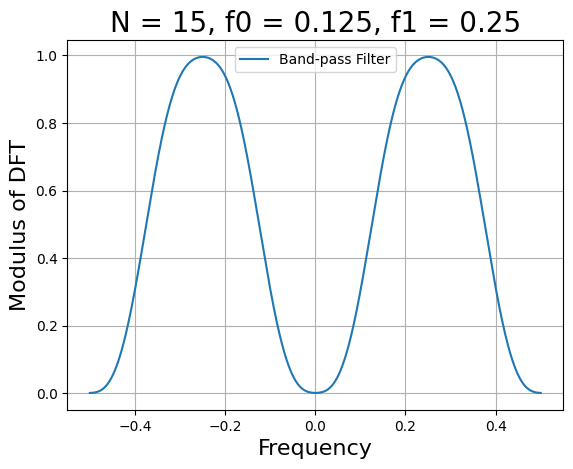

In [43]:
#We define f0 and f1
f0 = 0.125
f1 = 0.25

# We define filter coefficients for band-pass filter
def combined_filter(f0, f1, N):
    H_n = H_lambda(f0,N)
    filter_coefficients = []
    for n in range(-N//2+1, N//2+1):
      cos_component = 2 * H_n[n + N//2 - 1] * np.cos(2 * np.pi * f1 * n)

      # We apply Hamming window
      filter_coefficients.append(cos_component * w_h(n + N//2, N))
    return filter_coefficients

# We calculate the filter
filter_coeffs = combined_filter(f0, f1, N)

#We compute DFT of the filter
dft_filter = np.fft.fft(filter_coeffs, L)

# We plot the modulus of the DFT
plt.figure()
plt.plot(ax, np.abs(dft_filter), label = 'Band-pass Filter')
plt.title('N = '+str(N)+', f0 = '+str(f0)+', f1 = '+str(f1), fontsize = 20)
plt.xlabel("Frequency", fontsize = 16)
plt.ylabel("Modulus of DFT", fontsize = 16)
plt.legend()
plt.grid()
plt.show()